# Zadatak ptičice i avion
## Potrebno je učitati signal cvrkutanja pričica i poletanja aviona, a zatim ga što bolje obraditi tako da se prvenstveno čuje zvuk ptičica

#### Potrebne funkcije

In [6]:
def plotSequence(x, y, plotName = 'MyPlot', plotColor = 'tab:blue', xlims = [], ylims = [], xlabel = '', ylabel = '', showLegend = True):
    plt.plot(x, y, color = plotColor, label = plotName)
    if xlabel != '':
        plt.xlabel(xlabel)
    if ylabel != '':
        plt.ylabel(ylabel)
    if xlims != []:
        plt.xlim(xlims)
    if ylims != []:
        plt.ylim(ylims)
    if showLegend:
        plt.legend(loc = 'upper right')
        
def stemSequence(x, y, plotName = 'MyPlot', stemColor = 'tab:blue', xlims = [], ylims = [], xlabel = '', ylabel = '', showLegend = True):
    markerline, stemlines, baseline = plt.stem(x, y, stemColor, label = plotName)
    plt.setp(markerline, 'markerfacecolor', stemColor, 'markeredgecolor', stemColor)
    if xlabel != '':
        plt.xlabel(xlabel)
    if ylabel != '':
        plt.ylabel(ylabel)
    if xlims != []:
        plt.xlim(xlims)
    if ylims != []:
        plt.ylim(ylims)
    if showLegend:
        plt.legend(loc = 'upper right')

#### Potrebne biblioteke

In [7]:
import numpy as np
import matplotlib as mpl
mpl.rc('font', family = 'serif', size = 20)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,4)
import IPython
from scipy.io import wavfile
import scipy.fft as fft
import scipy.signal as signal

#### Učitavanje signala i i njegov prikaz

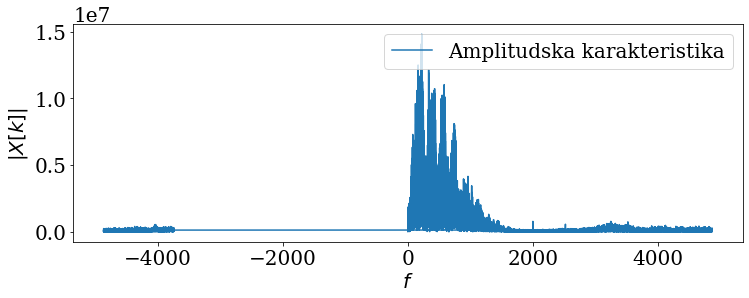

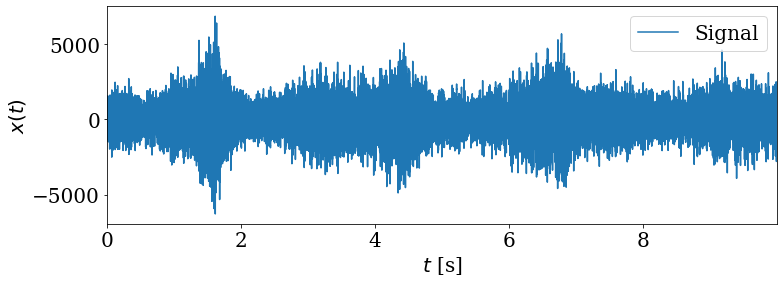

In [13]:
fs, x = wavfile.read('datasets/birds/pticice_avion.wav')
IPython.display.display(IPython.display.Audio(x, rate = fs))

fMaxShow = 6000

N = len(x)
X = fft.fft(x)

Nmax = fMaxShow*N//fs
f = fs*np.arange(Nmax)/N

# uzima se deo spektra
X = X[:len(f)];

plt.figure()
plotSequence(f, abs(X), plotName = 'Amplitudska karakteristika', xlabel = r'$f$', ylabel = r'$|X[k]|$')
    
t = np.arange(len(x))/fs

plt.figure()
plotSequence(t, x, plotName = 'Signal', xlims = [0, max(t)], xlabel = '$t$ [s]', ylabel = '$x(t)$')

#### Funkcija za formiranje spektrograma

In [15]:
def pfeSpectrogram(x, fs, fMaxShow, Nwin, log = True, window = ('hamming'), noverlap = None, aspect = 3, cmap = 'viridis'):
    window = signal.get_window(window, Nwin)
    NFFT = Nwin

    f, t, Sxx = signal.spectrogram(x, fs = fs, window=window, noverlap = noverlap, nfft=NFFT, return_onesided=True, 
                                   scaling='spectrum', mode='complex')
    
    fMaxIndex = NFFT*fMaxShow//fs
    
    fig, ax = plt.subplots()
    
    if log:
        SXa = 20*np.log10(abs(Sxx[:][:fMaxIndex]));
    else:
        SXa = abs(Sxx[:][:fMaxIndex])            
    
    ax.matshow(SXa, extent=[min(t), max(t), min(f), fMaxShow], origin='lower', cmap = cmap)
    
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
    
    plt.xlabel('$t$ [s]')
    plt.ylabel('$f$ [Hz]')


#### Plotovanje spektrograma datog signala

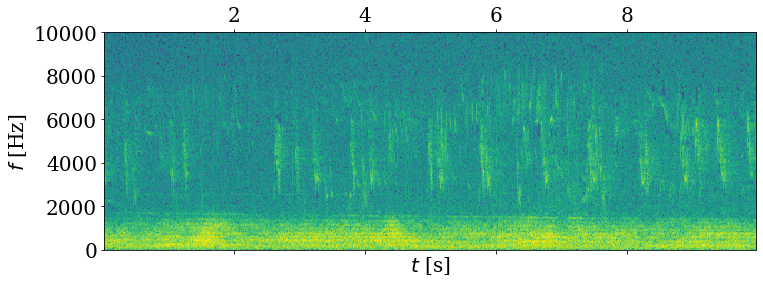

In [21]:
fMaxShow = 10000
Nwin = 1000
noverlap = Nwin//4
pfeSpectrogram(x, fs, fMaxShow, Nwin, noverlap = noverlap, aspect = 3)

#### Sa plotovanog spektrograma, potrebno je uočiti frekvencije koje predstavljaju buku koju stvara avion. Kada se logički dodje do zaključka, potrebno ih je otkloniti filtriranjem signala

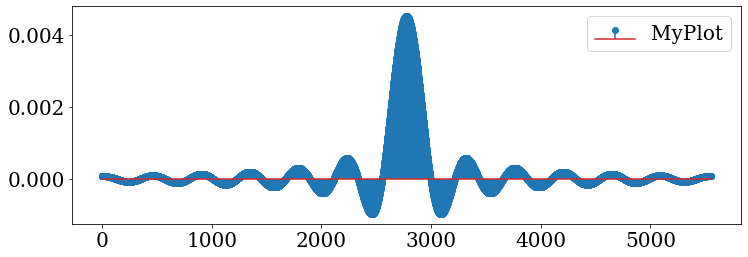

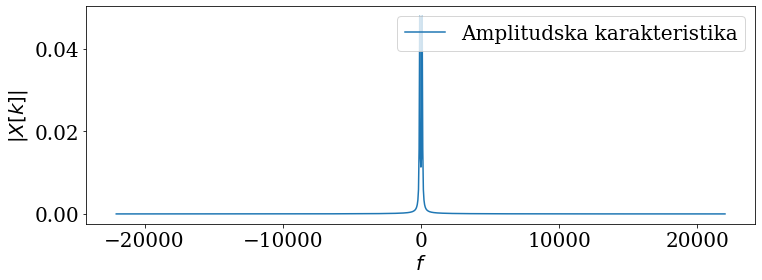

In [30]:
fc1 = 100
fc2 = 200

transitionBandwidth = 10
ripple = 0.05

parameters = signal.kaiserord(-20*np.log10(ripple), transitionBandwidth/fs*2)

# NF
h = signal.firwin(parameters[0], fc1, window=('kaiser', parameters[1]), fs=fs)
# VF
# h = signal.firwin(parameters[0], fc1, window=('kaiser', parameters[1]), fs=fs, pass_zero=False)
# NO
# h = signal.firwin(parameters[0], [fc1, fc2], window=('kaiser', parameters[1]), fs=fs)
# PO
# h = signal.firwin(parameters[0], [fc1, fc2], window=('kaiser', parameters[1]), fs=fs, pass_zero=False)

n = np.arange(len(h))

plt.figure()
stemSequence(n, h)

H = fft.fft(h, fs)
k = np.arange(len(H)) - len(H)//2
f = fs*k/len(H)
plt.figure()
plotSequence(f, abs(fft.fftshift(H)), plotName = 'Amplitudska karakteristika', xlabel = r'$f$', ylabel = r'$|X[k]|$')

plt.plot(H)
plt.show()